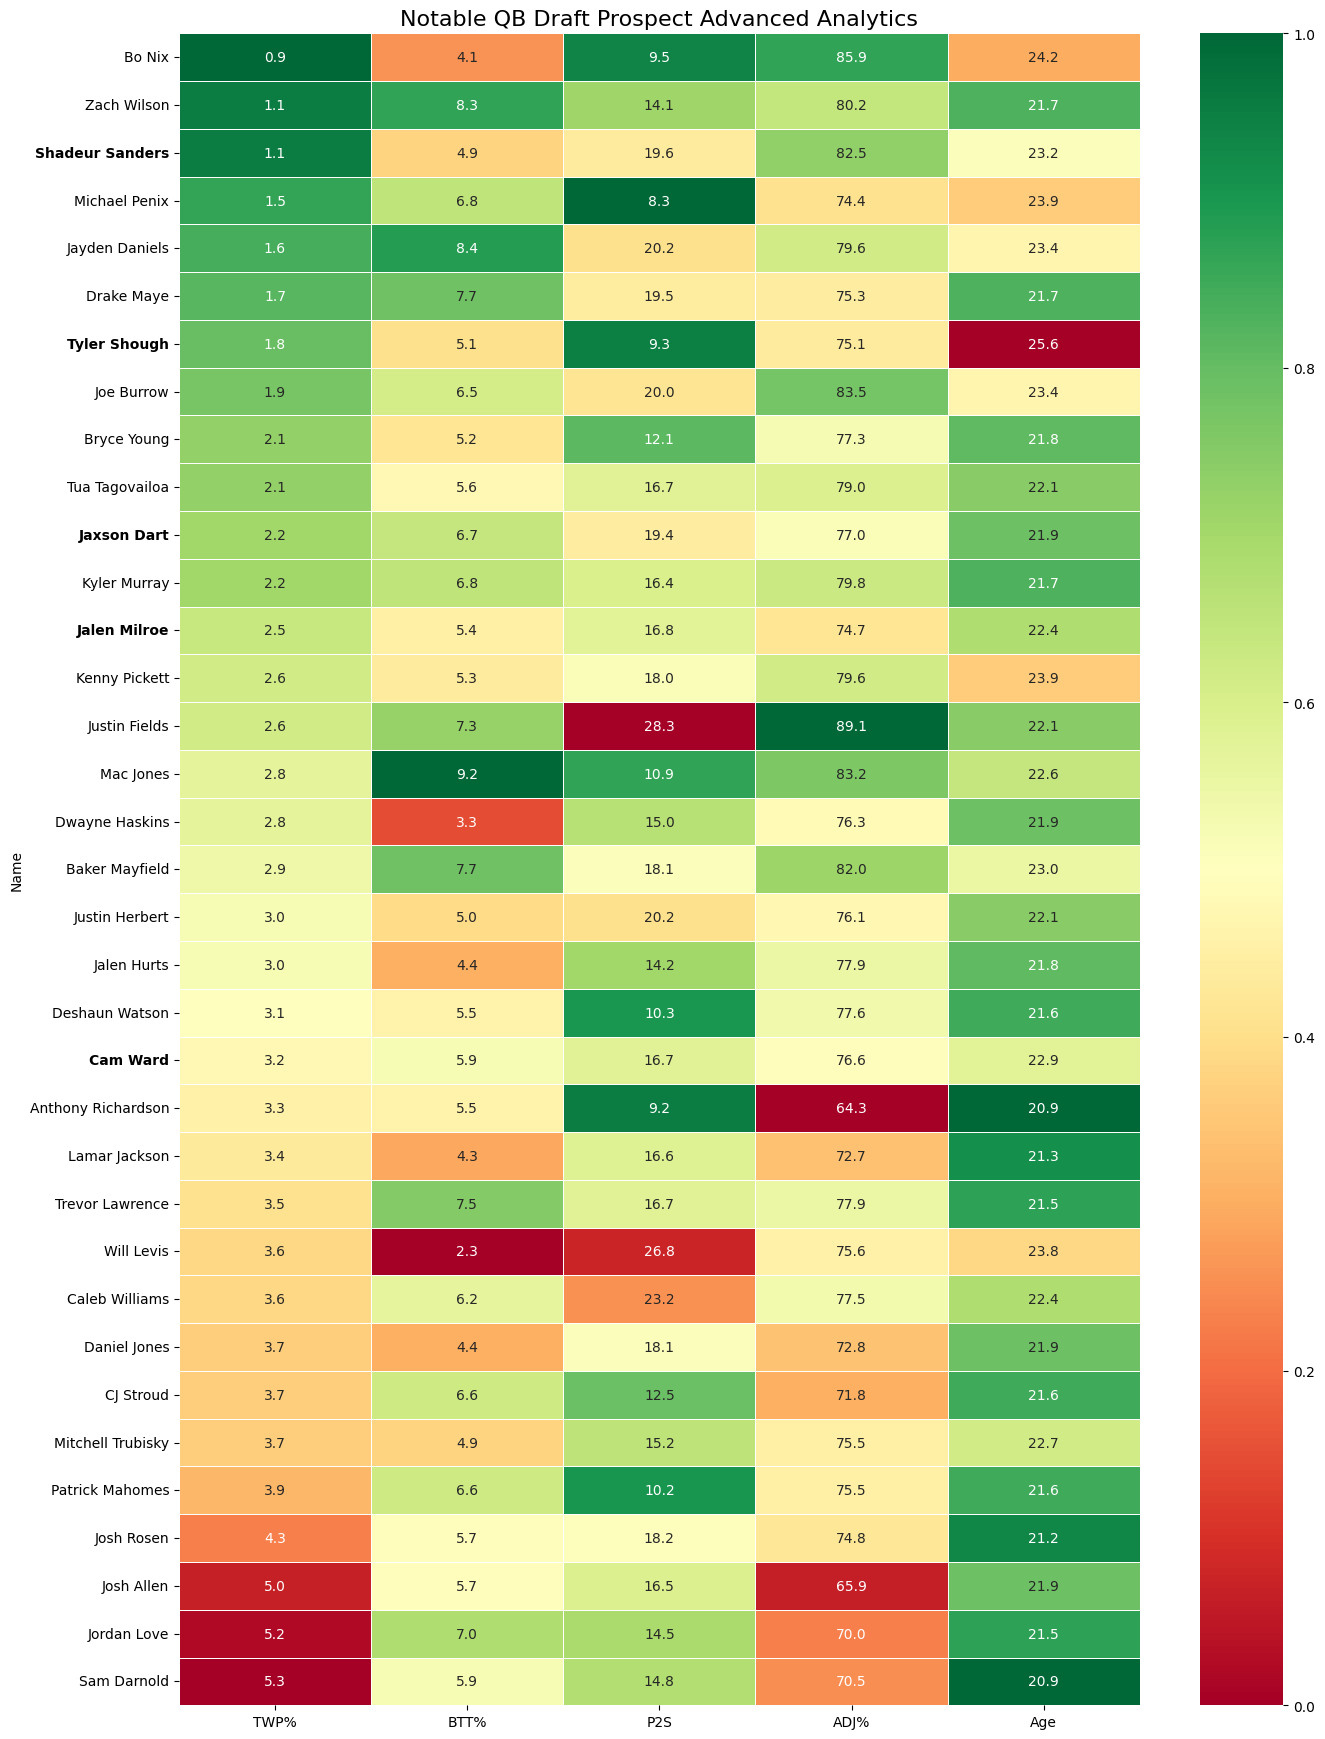

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load CSV
df = pd.read_csv("/Users/jakecardonick/Desktop/QBDraft2025.csv")

# Sort by TWP% ascending
df = df.sort_values(by="TWP%", ascending=True)

# Save names and set as index
index_col = df.columns[0]
df = df.set_index(index_col)

# Lower-is-better metrics
lower_is_better = ['P2S', 'TWP%', "Age"]

# Normalize for coloring
df_normalized = df.copy()
for col in df.columns:
    if pd.api.types.is_numeric_dtype(df[col]):
        if col in lower_is_better:
            df_normalized[col] = (df[col].max() - df[col]) / (df[col].max() - df[col].min())
        else:
            df_normalized[col] = (df[col] - df[col].min()) / (df[col].max() - df[col].min())

# Columns to display
df = df[["TWP%", "BTT%", "P2S", "ADJ%", "Age"]]
df_normalized = df_normalized[["TWP%", "BTT%", "P2S", "ADJ%", "Age"]]

# Bold targets
bold_names = {"Shadeur Sanders", "Cam Ward", "Tyler Shough", "Jalen Milroe", "Jaxson Dart"}

# Plot
plt.figure(figsize=(14, len(df) * 0.5))
ax = sns.heatmap(df_normalized,
                 annot=df,
                 fmt=".1f",
                 cmap="RdYlGn",
                 linewidths=0.5,
                 cbar=True)

# Bold selected y-axis labels
for label in ax.get_yticklabels():
    if label.get_text() in bold_names:
        label.set_weight("bold")

plt.title("Notable QB Draft Prospect Advanced Analytics", fontsize=16)
plt.tight_layout()
plt.show()


from sklearn.metrics.pairwise import euclidean_distances

# List of target QBs
target_qbs = ["Cam Ward", "Shadeur Sanders", "Jaxson Dart", "Jalen Milroe", "Tyler Shough"]

# Split into target QBs and past 1st-rounders
prospects_df = df_normalized.loc[target_qbs]
first_rounders_df = df_normalized.drop(index=target_qbs)

# Compute pairwise distances: each prospect vs. each past 1st-rounder
distances = euclidean_distances(prospects_df, first_rounders_df)

# Convert to similarity scores
max_dist = distances.max()
similarities = 100 * (1 - distances / max_dist)

# Format as DataFrame
similarity_df = pd.DataFrame(similarities, 
                             index=prospects_df.index, 
                             columns=first_rounders_df.index)



